In [420]:
words = open('names.txt', 'r').read().splitlines()

In [421]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [422]:
len(words)

32033

In [423]:
min(len(w) for w in words)

2

In [424]:
max(len(w) for w in words)

15

In [425]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [426]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [427]:
import torch

In [428]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [429]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [430]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

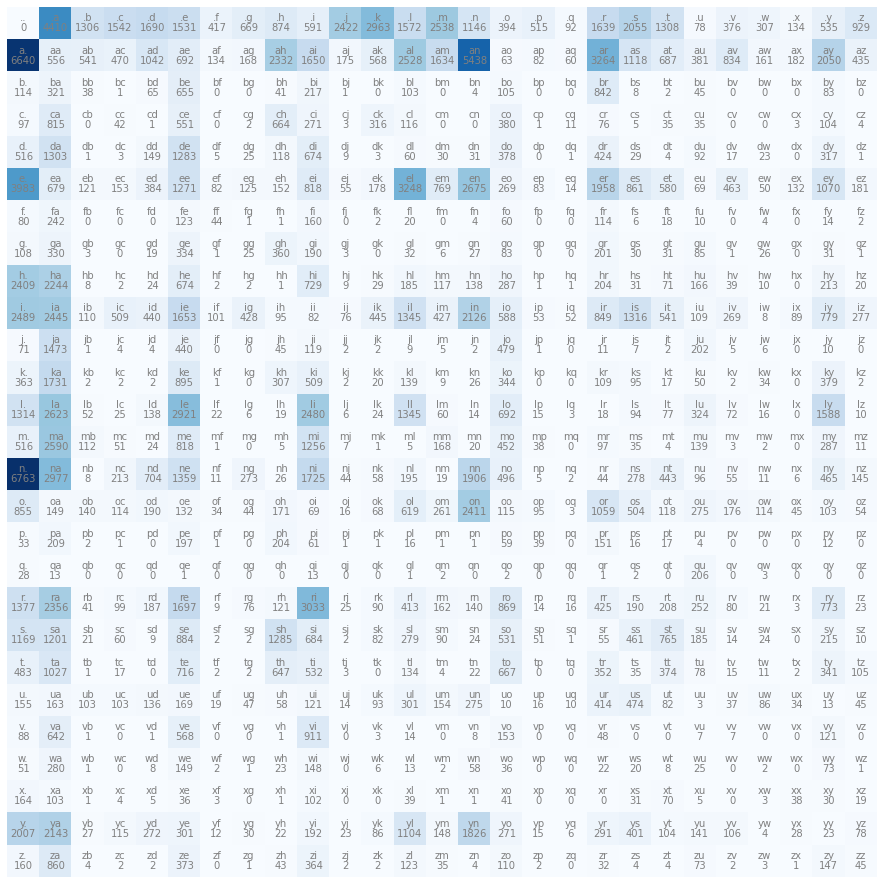

In [431]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i , N[i, j].item(), ha="center", va="top", color='gray')
plt.axis("off")

In [432]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [433]:
p = N[0].float()
p = p/ p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [434]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [435]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [436]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [437]:
p.shape

torch.Size([3])

In [438]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [439]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [440]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [441]:
# creating the training set of bigrams
xs, ys = [] ,[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [442]:
xs

tensor([ 0,  5, 13, 13,  1])

In [443]:
ys

tensor([ 5, 13, 13,  1,  0])

In [444]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [445]:
xenc.shape

torch.Size([5, 27])

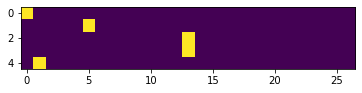

In [446]:
plt.imshow(xenc)

In [447]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.5969, -1.2173,  1.0261, -1.4588,  0.2481, -0.1999, -1.3144, -1.4056,
          0.7559,  0.1502,  0.3195,  0.6286,  1.1483,  0.5564, -0.4267, -1.0279,
          0.1282, -0.2830, -2.1738, -0.9518, -0.2154, -0.3665,  0.0491,  0.0356,
         -0.3787,  1.0463, -1.7178],
        [ 0.6968,  1.0861, -0.0675, -0.5169,  2.5506, -1.3002,  0.0243, -0.1969,
          1.7726,  1.9075,  1.0103,  0.5274,  1.0792, -0.5072,  0.5899,  1.2226,
         -0.1810,  0.3714,  0.6075,  1.4735, -2.0271,  0.5114,  1.6964,  0.2782,
         -0.3254, -0.0478, -1.2247],
        [ 0.6234,  0.2630, -0.1391,  0.1657,  0.0481, -1.5828,  1.4363, -2.6494,
         -0.4449, -0.2594, -1.7414, -2.2258, -0.1416, -0.3385, -0.8269,  1.1884,
          0.9341, -0.2036, -2.5635, -1.3011,  0.0264, -1.5344,  0.3262, -1.6892,
          1.3468, -0.6067,  1.0492],
        [ 0.6234,  0.2630, -0.1391,  0.1657,  0.0481, -1.5828,  1.4363, -2.6494,
         -0.4449, -0.2594, -1.7414, -2.2258, -0.1416, -0.3385, -0.8269,  1.1884

In [448]:
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0608, 0.0099, 0.0934, 0.0078, 0.0429, 0.0274, 0.0090, 0.0082, 0.0712,
         0.0389, 0.0461, 0.0627, 0.1055, 0.0584, 0.0218, 0.0120, 0.0380, 0.0252,
         0.0038, 0.0129, 0.0270, 0.0232, 0.0351, 0.0347, 0.0229, 0.0953, 0.0060],
        [0.0303, 0.0447, 0.0141, 0.0090, 0.1934, 0.0041, 0.0155, 0.0124, 0.0888,
         0.1016, 0.0414, 0.0256, 0.0444, 0.0091, 0.0272, 0.0512, 0.0126, 0.0219,
         0.0277, 0.0659, 0.0020, 0.0252, 0.0823, 0.0199, 0.0109, 0.0144, 0.0044],
        [0.0592, 0.0413, 0.0276, 0.0375, 0.0333, 0.0065, 0.1335, 0.0022, 0.0203,
         0.0245, 0.0056, 0.0034, 0.0275, 0.0226, 0.0139, 0.1041, 0.0808, 0.0259,
         0.0024, 0.0086, 0.0326, 0.0068, 0.0440, 0.0059, 0.1220, 0.0173, 0.0906],
        [0.0592, 0.0413, 0.0276, 0.0375, 0.0333, 0.0065, 0.1335, 0.0022, 0.0203,
         0.0245, 0.0056, 0.0034, 0.0275, 0.0226, 0.0139, 0.1041, 0.0808, 0.0259,
         0.0024, 0.0086, 0.0326, 0.0068, 0.0440, 0.0059, 0.1220, 0.0173, 0.0906],
        [0.0094, 0.0159,

In [449]:
probs[0].sum()

tensor(1.0000)

In [450]:
xs

tensor([ 0,  5, 13, 13,  1])

In [451]:
ys

tensor([ 5, 13, 13,  1,  0])

In [452]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [453]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

In [454]:
probs.shape

torch.Size([5, 27])

In [455]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label(actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correcr character:', p.item())
    logp = torch.log(p)
    print(' log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e loss:', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label(actual next character): 5
probability assigned by the net to the correcr character: 0.01228625513613224
 log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label(actual next character): 13
probability assigned by the net to the correcr character: 0.018050700

## Optimization

In [456]:
xs

tensor([ 0,  5, 13, 13,  1])

In [457]:
ys

tensor([ 5, 13, 13,  1,  0])

In [458]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [459]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [460]:
#backward pass
W.grad = None   #i.e. zero
loss.backward()

In [461]:
W.data += -0.1 * W.grad

In [462]:
loss.item()

3.7693049907684326

# Rearranging

In [463]:
# create the dataset
xs, ys = [] ,[]
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of exmaples: ', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of exmaples:  228146


In [515]:
(W**2).sum() 

tensor(1539.9529, grad_fn=<SumBackward0>)

In [516]:
#gradient descent

for k in range(100):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() 
    print(loss.item())

    #backward pass
    W.grad = None   #i.e. zero
    loss.backward()

    #update
    W.data += -50 * W.grad

2.4834048748016357
2.4833645820617676
2.483327627182007
2.483292818069458
2.483259677886963
2.4832277297973633
2.483196973800659
2.4831674098968506
2.4831385612487793
2.4831106662750244
2.483083963394165
2.483057975769043
2.4830322265625
2.4830074310302734
2.482983350753784
2.482959508895874
2.482936382293701
2.4829137325286865
2.4828920364379883
2.482870101928711
2.482848882675171
2.482828140258789
2.4828073978424072
2.482787609100342
2.4827680587768555
2.4827487468719482
2.482729911804199
2.4827113151550293
2.4826929569244385
2.4826745986938477
2.4826571941375732
2.482639789581299
2.4826226234436035
2.4826056957244873
2.48258900642395
2.482572317123413
2.482556104660034
2.4825403690338135
2.482524871826172
2.482509136199951
2.4824938774108887
2.4824788570404053
2.482463836669922
2.4824490547180176
2.4824342727661133
2.4824204444885254
2.4824061393737793
2.4823920726776123
2.4823784828186035
2.4823646545410156
2.482351303100586
2.482337713241577
2.4823243618011475
2.482311487197876
2.

In [519]:
#sampling
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:
        # p = P[ix]
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)
        

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix ==0:
            break
    print("".join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
